In [5]:
#Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

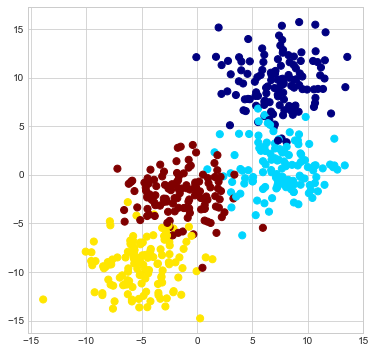

In [6]:
# get the fake data

from sklearn.datasets import  make_blobs

X,y =make_blobs(n_samples=500,centers=4,random_state=8,cluster_std=2.4)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='jet')

In [8]:
from sklearn.tree import DecisionTreeClassifier

### Plotting the Meshgrid for visulizating the Decision Boundary

In [9]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

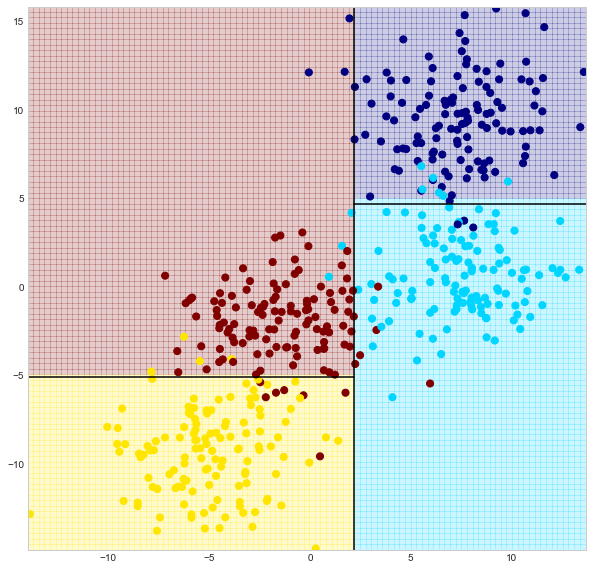

In [10]:
# Set model variable
clf = DecisionTreeClassifier(max_depth=2,random_state=0)

# Show Boundaries
visualize_tree(clf,X,y)

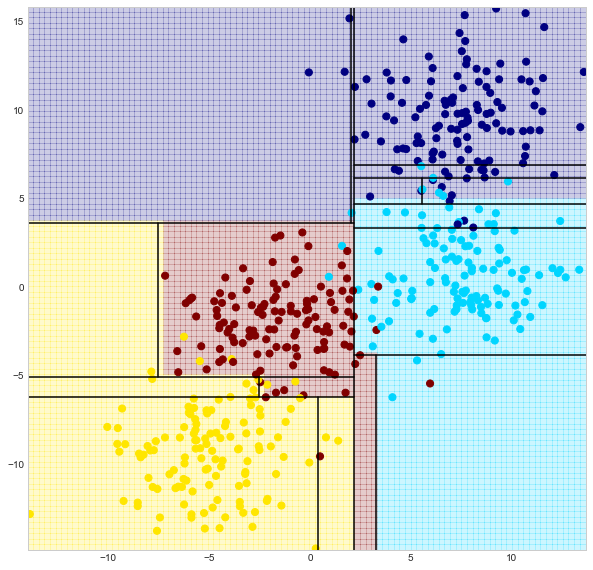

In [11]:
# Set model variable
# increase the max_depth param
clf = DecisionTreeClassifier(max_depth=4,random_state=0)

# Show Boundaries--- Over Fitting
visualize_tree(clf,X,y)

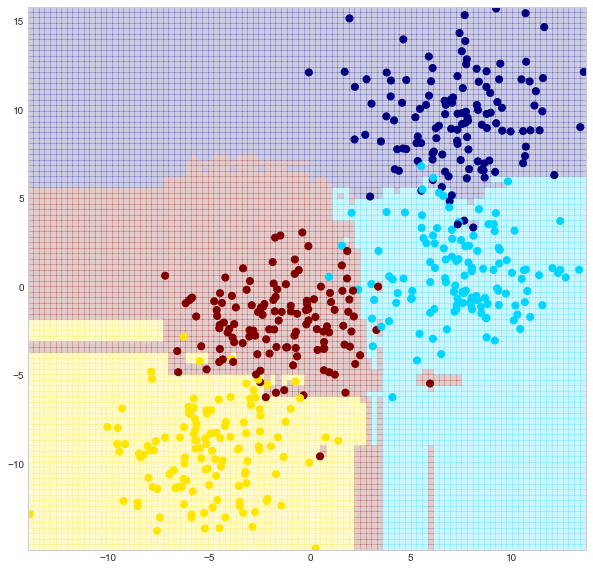

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100 , random_state=0) # n_estimators means mtree

visualize_tree(clf,X,y,boundaries=False)

In [13]:
x=10*np.random.rand(100)

In [14]:
x

array([ 8.80593766,  0.44011559,  0.06152981,  3.28380456,  5.97957522,
        5.93789419,  0.18470943,  6.4408708 ,  1.62174734,  7.36094426,
        6.46630658,  4.00177964,  4.07637809,  9.24887995,  5.77922562,
        2.72119361,  5.70728048,  5.68551233,  2.04025375,  3.7256693 ,
        2.15819199,  9.19800846,  8.98886558,  0.84853383,  9.48129205,
        8.91521693,  1.89181058,  3.8349081 ,  1.70899745,  1.41886719,
        4.94368935,  4.05182376,  5.59333253,  0.58028168,  8.77520681,
        7.14854026,  4.080645  ,  0.11320616,  9.885289  ,  9.90732966,
        2.24776474,  0.44140642,  7.97251875,  1.45486728,  0.15976013,
        2.9444266 ,  7.96786815,  6.11280922,  5.01751834,  4.99991236,
        2.73004353,  3.01205003,  9.90122962,  1.27553692,  2.27009947,
        0.97152728,  7.96376474,  9.90141557,  2.97449267,  4.08913083,
        2.25609093,  9.76820386,  0.16767285,  0.36708177,  0.35221851,
        7.47105358,  3.95802402,  5.09180825,  2.8685567 ,  8.76

In [15]:
def sin_model(x,sigma=0.2):
    
    noise=sigma*np.random.rand(len(x))
    
    return np.sin(5*x)+np.sin(0.5*x)+noise

In [16]:
y=sin_model(x)

<Container object of 3 artists>

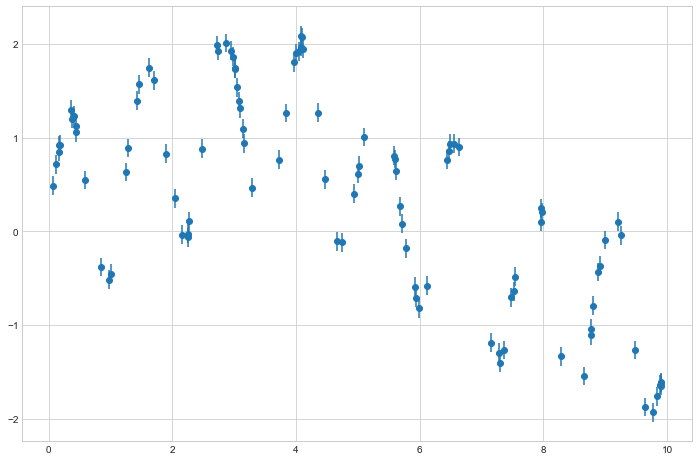

In [20]:
plt.figure(figsize=(12,8))
plt.errorbar(x,y,0.1,fmt='o')

In [22]:
from sklearn.ensemble import RandomForestRegressor
xfit=np.linspace(0,10,1000)

rfr=RandomForestRegressor(100)

rfr.fit(x[:,None],y)

yfit=rfr.predict(xfit[:,None])

In [26]:
x.shape #just a vector

(100,)

In [27]:
x[:,None] # a column matrix

array([[ 8.80593766],
       [ 0.44011559],
       [ 0.06152981],
       [ 3.28380456],
       [ 5.97957522],
       [ 5.93789419],
       [ 0.18470943],
       [ 6.4408708 ],
       [ 1.62174734],
       [ 7.36094426],
       [ 6.46630658],
       [ 4.00177964],
       [ 4.07637809],
       [ 9.24887995],
       [ 5.77922562],
       [ 2.72119361],
       [ 5.70728048],
       [ 5.68551233],
       [ 2.04025375],
       [ 3.7256693 ],
       [ 2.15819199],
       [ 9.19800846],
       [ 8.98886558],
       [ 0.84853383],
       [ 9.48129205],
       [ 8.91521693],
       [ 1.89181058],
       [ 3.8349081 ],
       [ 1.70899745],
       [ 1.41886719],
       [ 4.94368935],
       [ 4.05182376],
       [ 5.59333253],
       [ 0.58028168],
       [ 8.77520681],
       [ 7.14854026],
       [ 4.080645  ],
       [ 0.11320616],
       [ 9.885289  ],
       [ 9.90732966],
       [ 2.24776474],
       [ 0.44140642],
       [ 7.97251875],
       [ 1.45486728],
       [ 0.15976013],
       [ 2

In [28]:
x[:,None].shape

(100, 1)

In [29]:
ytrue=sin_model(xfit,0)

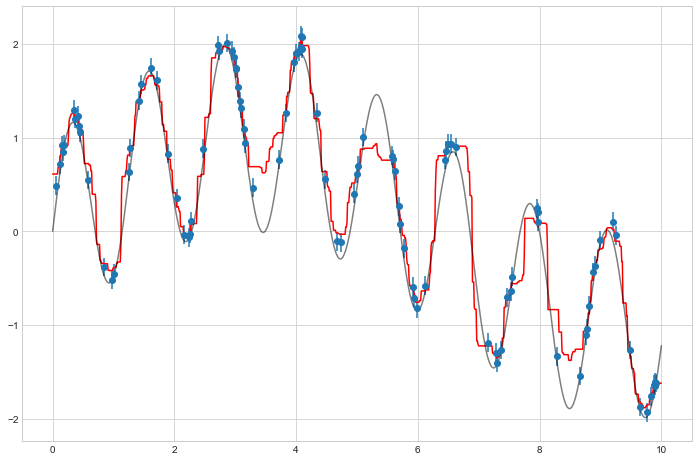

In [33]:
plt.figure(figsize=(12,8))
plt.errorbar(x,y,0.1,fmt='o')
plt.plot(xfit,yfit,'-r')
plt.plot(xfit,ytrue,'-k',alpha=0.5)